# Computing Relative Feature Importance

When working with a dataset that contains N-dimensional data points, we have to understand that not all features are equally important. Some are more discriminative than others. If we have this information, we can use it to reduce the dimensional. This is very useful in reducing the complexity and increasing the speed of the algorithm. Redundant features can be safely removed from the dataset.

We will be using __AdaBoost__ regressor to compute feature importance. __AdaBoost__, short for __Adaptive Boosting__ is an algorithm that's frequently used in conjuction with other machine learning algorithms to improve their performance. In __AdaBoost__, the training data points are drawn from a distribution to train the current classifier. This distribution is updated iteratively so that the subsequent classifier get to focus on the more difficult data points. The difficult data points are the ones that are misclassified. This is done by updating the distribution at each step. This will make the data points that were previously misclassified more likely to come up in the next sample dataset that is used for training. These classifiers are then cascaded and the decision is taken through weighted majority voting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

AdaBoost Regressor
Mean Squared Error: 22.3
Explained Variance Score: 0.8


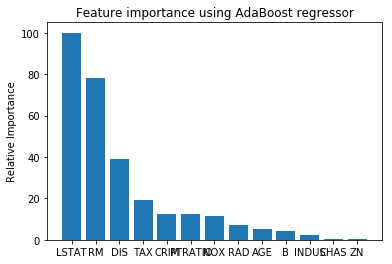

In [7]:
# Load housing data
housing_data = datasets.load_boston()

# Shuffle the data
X, y = shuffle(housing_data.data, housing_data.target, random_state=7)

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# AdaBoost Regressor Model
regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=400, random_state=7)
regressor.fit(X_train, y_train)

# Evaluate the performance of AdaBoostRegressor
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print('AdaBoost Regressor')
print('Mean Squared Error: {}'.format(round(mse, 2)))
print('Explained Variance Score: {}'.format(round(evs, 2)))

# Extract feature importance
feature_importances = regressor.feature_importances_
feature_names = housing_data.feature_names
# Normalize the importance values
feature_importances = 100.0 * (feature_importances / max(feature_importances))

# Sort the values and flip them
index_sorted = np.flipud(np.argsort(feature_importances))

# Arrange the X ticks
pos = np.arange(index_sorted.shape[0]) + 0.5

# Plot the bar graph
plt.figure()
plt.bar(pos, feature_importances[index_sorted], align='center')
plt.xticks(pos, feature_names[index_sorted])
plt.ylabel('Relative Importance')
plt.title('Feature importance using AdaBoost regressor')
plt.show()